# ISYE 6740 FALL 2020
# HOMEWORK 3

##### By: Da Yang (dyang347@gatech.edu)



## 1. Density estimation: Psychological experiments. (45 points)

We will use this data to study whether or not the two brain regions are likely to be independent of each other and considering different types of political view **For this question; you can use the proper package for histogram and KDE; no need to write your own.** The data set **n90pol.csv** contains information on 90 university students who participated in a psychological experiment designed to look for relationships between the size of different regions of the brain and political views. The variables **amygdala** and **acc** indicate the volume of two particular brain regions known to be involved in emotions and decision-making, the amygdala and the anterior cingulate cortex; more exactly, these are residuals from the predicted volume, after adjusting for height, sex, and similar body-type variables. The variable **orientation** gives the students' locations on a five-point scale from 1 (very conservative) to 5 (very liberal).  Note that in the dataset, we only have observations for orientation from 2 to 5. 

In [969]:
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
import scipy.sparse.linalg as ll
from scipy.stats import multivariate_normal as mvn

import scipy.io as spio


sns.set()

In [804]:
 os.chdir(r'/Users/alexyang/Desktop/GT OMSA/FA20 ISYE6740/HW3/data')

#### (a)
(10 points) Form the 1-dimensional histogram and KDE to estimate the distributions of **amygdala** and **acc**, respectively. For this question, you can ignore the variable **orientation**.

### Answer (a)

In [675]:
# read data into pandas DataFrame
df_raw = pd.read_csv('n90pol.csv')
df_raw.head()

,amygdala,acc,orientation
0,0.0051,-0.0286,2
1,-0.0674,0.0007,3
2,-0.0257,-0.0110,3
3,0.0504,-0.0167,2
4,0.0125,-0.0005,5


In [676]:
# show shape of the dataframe
df_raw.shape

(90, 3)

In [677]:
# show basic statistics, especially show the min and max of the variablesb
df_raw.describe()

,amygdala,acc,orientation
count,90.000000,90.000000,90.000000
mean,0.000001,-0.000006,3.577778
std,0.032605,0.020435,0.899160
min,-0.067600,-0.037700,2.000000
25%,-0.020150,-0.012200,3.000000
50%,-0.000700,-0.003950,4.000000
75%,0.024775,0.011650,4.000000
max,0.081200,0.055900,5.000000


In [678]:
# convert DataFrame in Numpy Array
df_arr = df_raw.to_numpy()

#### 1-D Histogram 
Create 1 dimensional histogram for Amygdala and Acc respectively

##### - Amygdala

In [679]:
# range of the data
amy_min = min(df_raw['amygdala'])
amy_max = max(df_raw['amygdala'])
print('Variable Amygdala has range from {} to {}'.format(amy_min, amy_max))

Variable Amygdala has range from -0.0676 to 0.0812


Text(0.5, 0.98, '1-D Histogram of Amygdala')

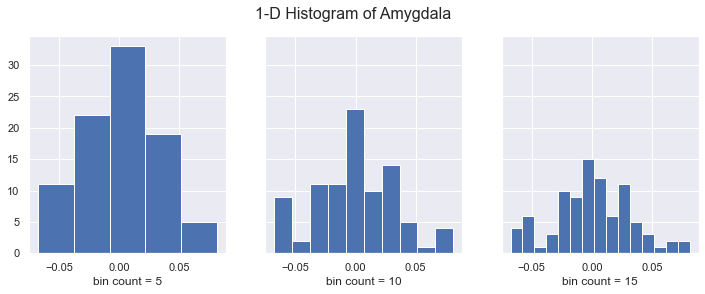

In [680]:
fig, ax = plt.subplots(1,3,figsize=(12,4), sharey=True)

for i, axi in enumerate(ax.flat):
    bin_count = (i+1)*5
    axi.hist(df_raw['amygdala'], bins=bin_count)
    axi.set_xlabel('bin count = {}'.format(bin_count), fontsize=12)

fig.suptitle('1-D Histogram of Amygdala', fontsize=16)

##### - Acc

In [681]:
# range of the data
amy_min = min(df_raw['acc'])
amy_max = max(df_raw['acc'])
print('Variable Acc has range from {} to {}'.format(amy_min, amy_max))

Variable Acc has range from -0.0377 to 0.0559


Text(0.5, 0.98, '1-D Histogram of Acc')

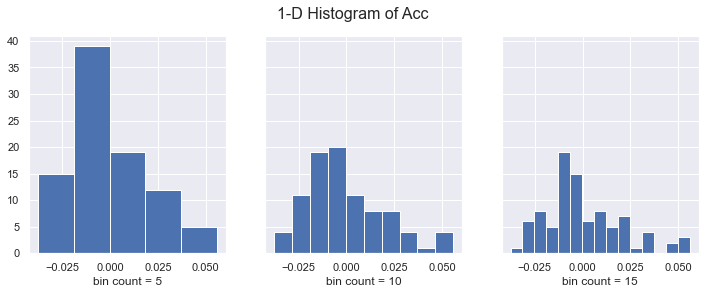

In [682]:
fig, ax = plt.subplots(1,3,figsize=(12,4), sharey=True)

for i, axi in enumerate(ax.flat):
    bin_count = (i+1)*5
    axi.hist(df_raw['acc'], bins=bin_count)
    axi.set_xlabel('bin count = {}'.format(bin_count), fontsize=12)

fig.suptitle('1-D Histogram of Acc', fontsize=16)

#### 1-D KDE - Marginal Distribution

In [683]:
# use sklearn kernel density estimate
from sklearn.neighbors import KernelDensity

In [747]:
# create function calculate marginal kde
def mkde(x, bins=100, bw=0.01):
    
    # calculate the size of bin based on x
    deltax = (max(x) - min(x))/bins
    x_min = min(x) - 30*deltax
    x_max = max(x) + 30*deltax
    
    # calcualte the x axis based on the range and bin size
    x_axis = np.linspace(x_min, x_max, bins)[:, np.newaxis]
    # print(x_axis.shape)
    
    x_arr = x.reshape(-1,1)
    
    # print(x_arr.shape)
    
    # train and fit the x into Kernel Density Estimator
    mkde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(x_arr)
    
    # calculate log probability
    log_density = mkde.score_samples(x_axis)
    
    return np.exp(log_density), x_axis

##### -- amgydala

Text(0.5, 1.0, '1-D KDE of Amygdala')

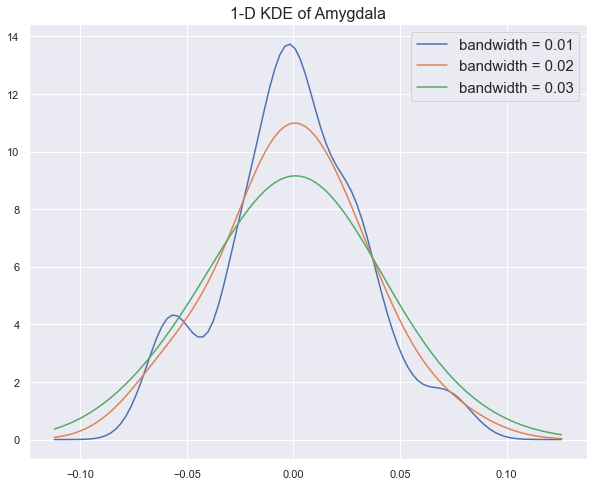

In [748]:
# plot Marginal KDE based on the model with different bandwidth
fig = plt.figure(figsize=(10,8))
for i, axi in enumerate(ax.flat):
    bw_i = (i+1)*0.01
    kde, x_axis = mkde(df_arr[:,0], bins=100, bw=bw_i)
    axi = sns.lineplot(y=kde, x=x_axis.flatten(), label='bandwidth = {}'.format(bw_i))
    #axi.set_xlabel('bandwidth = {}'.format(bw_i), fontsize=12)
plt.legend(fontsize=15, title_fontsize=20)
plt.title('1-D KDE of Amygdala', fontsize=16)

##### -acc

Text(0.5, 1.0, '1-D KDE of Acc')

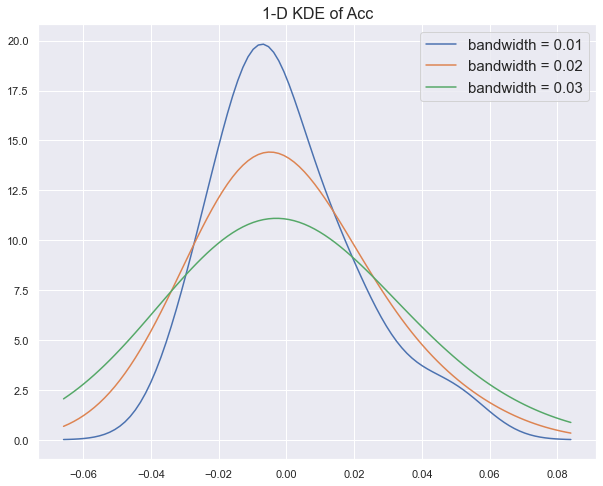

In [749]:
# plot Marginal KDE based on the model with different bandwidth
fig = plt.figure(figsize=(10,8))
for i, axi in enumerate(ax.flat):
    bw_i = (i+1)*0.01
    kde, x_axis = mkde(df_arr[:,1], bins=100, bw=bw_i)
    axi = sns.lineplot(y=kde, x=x_axis.flatten(), label='bandwidth = {}'.format(bw_i))
    #axi.set_xlabel('bandwidth = {}'.format(bw_i), fontsize=12)
plt.legend(fontsize=15, title_fontsize=20)
plt.title('1-D KDE of Acc', fontsize=16)

#### (b)
(10 points) Form 2-dimensional histogram for the pairs of variables (**amygdala**, **acc**). Decide on a suitable number of bins so you can see the shape of the distribution clearly. Also use kernel-density-estimation (KDE) to estimate the 2-dimensional density function of (**amygdala**, **acc**). Use a simple multi-dimensional Gaussian kernel, for $$x = \begin{bmatrix}x_1\\x_2\end{bmatrix}\in \mathbb R^2$$ where $x_1$ and $x_2$ are the two dimensions respectively $$K(x) = \frac{1}{2\pi} e^{-\frac{(x_1)^2 + (x_2)^2}{2}}$$ 
<br>
Recall in this case, the kernel density estimator (KDE) for a density is given by
<br>
<br>
 $$p(x) = \frac 1 m \sum_{i=1}^m \frac 1 h
 K\left(
 \frac{x^i - x}{h}
 \right)$$
 
where $x^i$ are two-dimensional vectors, $h >0$ is the kernel bandwidth. Set an appropriate $h$ so you can see the shape of the distribution clearly. Plot the contour plot (like the ones in slides) for your estimated density. For this question, you can ignore the variable **orientation**. 


### Answer (b)

In [687]:
df_raw.min()

amygdala      -0.0676
acc           -0.0377
orientation    2.0000
dtype: float64

In [688]:
df_raw.max()

amygdala       0.0812
acc            0.0559
orientation    5.0000
dtype: float64

Text(0.5, 0.92, '2-Dimensional Histogram of Amygdala and Acc, bin=20')

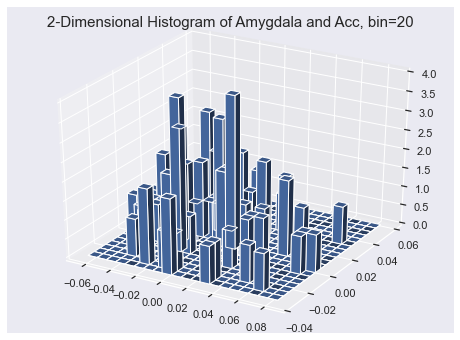

In [689]:
nbin = 20       # you can change the number of bins in each dimension
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(df_raw['amygdala'], df_raw['acc'], bins=nbin)
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])
xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)
dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz )
ax.set_title('2-Dimensional Histogram of Amygdala and Acc, bin=20', fontsize=15)   

Text(0.5, 0.92, '2-Dimensional Histogram of Amygdala and Acc, bin=10')

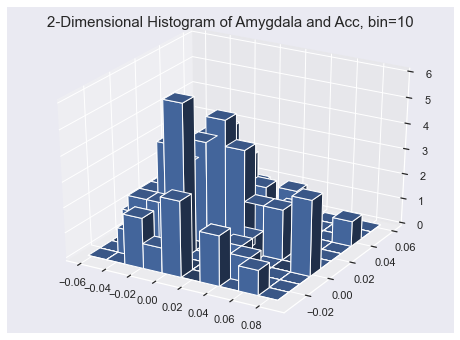

In [690]:
nbin = 10      # you can change the number of bins in each dimension
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(df_raw['amygdala'], df_raw['acc'], bins=nbin)
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])
xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)
dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz )
ax.set_title('2-Dimensional Histogram of Amygdala and Acc, bin=10', fontsize=15)   

### 2-D KDE Implementation

##### -- Use Seaborn KDE PLOT directly

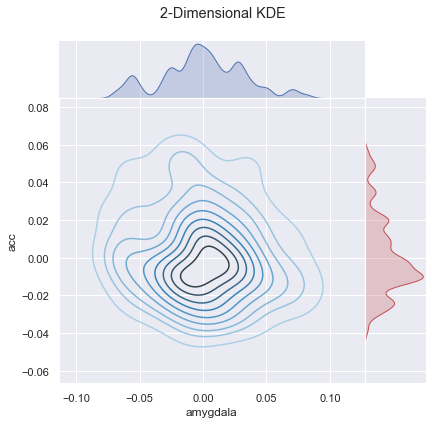

In [691]:
# tested with different bw_method. from the result, bw_method = 0.15 will give a better shape of KDE
g = sns.JointGrid(x="amygdala", y="acc", data=df_raw, space=0)
g = g.plot_joint(sns.kdeplot, cmap="Blues_d")
sns.kdeplot(df_raw["amygdala"], color="b", shade=True, bw_method=0.15, ax=g.ax_marg_x)
sns.kdeplot(y=df_raw["acc"], color="r", shade=True, bw_method=0.15, ax=g.ax_marg_y)
g.fig.suptitle('2-Dimensional KDE')
plt.subplots_adjust(top=0.9)

##### - Use sklearn.KernelDensity

In [789]:
# create function calculate marginal kde
def mul_kde(data, bins=100, bw=0.01):
    x = data[:,0]
    y = data[:,1]
        
    
    deltax = (max(x) - min(x))/bins
    x_min = min(x) - 25*deltax
    x_max = max(x) + 25*deltax
    x_arr = x.reshape(-1,1)    
    
    deltay = (max(y) - min(y))/bins
    y_min = min(y) - 25*deltay
    y_max = max(y) + 25*deltay
    y_arr = y.reshape(-1,1)
    

    # calcualte the x axis based on the range and bin size
    x_axis = np.linspace(x_min, x_max, bins)
    y_axis = np.linspace(y_min, y_max, bins)
    
    xx,yy = np.meshgrid(x_axis, y_axis)
    xy_sample = np.vstack([xx.ravel(), yy.ravel()]).T
    
    
    mul_kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(data[:,:2])
    log_density = mul_kde.score_samples(xy_sample)
    z = np.exp(log_density)
    z = z.reshape(xx.shape)
    return z, xx, yy

Text(0.5, 0.98, '2-D KDE')

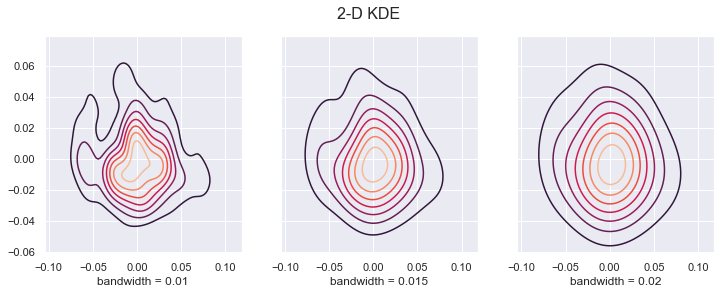

In [790]:
fig, ax = plt.subplots(1,3,figsize=(12,4), sharey=True)

for i, axi in enumerate(ax.flat):
    bw = 0.01+i*0.005
    zz, xx,yy = mul_kde(df_arr, bw=bw, bins=100)
    axi.contour(xx,yy,zz)
    axi.set_xlabel('bandwidth = {}'.format(bw), fontsize=12)

fig.suptitle('2-D KDE', fontsize=16)

#### (c)
 (10 points) Using (a) and (b), using KDE estimators, verify whether or not  the variables **amygdala** and **acc** are independent? You can tell this by checking do we approximately have $p( \textsf{amygdala},  \textsf{acc}) = p( \textsf{amygdala}) p(\textsf{acc})$? <br>
 
To verify this, please show three plots: the map for $p( \textsf{amygdala},  \textsf{acc})$, the map for $p( \textsf{amygdala}) p(\textsf{acc})$ and the error map $|p( \textsf{amygdala},  \textsf{acc}) - p( \textsf{amygdala}) p(\textsf{acc})|$. Comment on your results and whether this helps us to find out whether the two parts of brains (for emotions and decision-making) functions independently or they are related. 


In [1339]:
# calculate joint density using 2d KDE

z_2d, xx, yy = mul_kde(df_arr)

In [1340]:
z_2d.shape

(100, 100)

In [1341]:
# calculate marginal density using 1d KDE
z_amg, axis_amg = mkde(df_arr[:,0])
z_acc, axis_acc  = mkde(df_arr[:,1])

$p( \textsf{amygdala}) \times p(\textsf{acc})$ 

In [1342]:
p_dot = np.outer(z_amg, z_acc)

In [1343]:
p_dot.shape

(100, 100)

$|p( \textsf{amygdala},  \textsf{acc}) - p( \textsf{amygdala}) p(\textsf{acc})|$

In [1344]:
p_diff = z_2d - p_dot

Text(0.5, 1.0, 'error map')

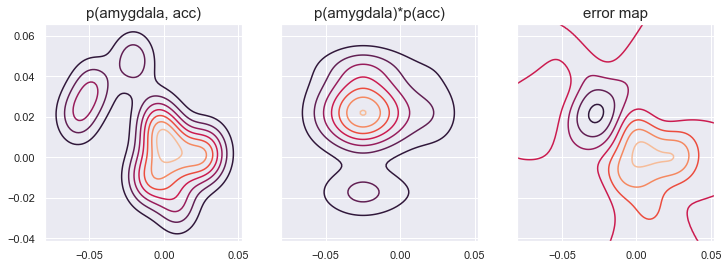

In [1345]:
fig, ax = plt.subplots(1,3,figsize=(12,4), sharey=True)

ax[0].contour(xx, yy, z_2d)
ax[0].set_title('p(amygdala, acc)', fontsize=15)
ax[1].contour(xx, yy, p_dot)
ax[1].set_title('p(amygdala)*p(acc)',fontsize=15)
ax[2].contour(xx, yy, p_diff)
ax[2].set_title('error map', fontsize=15)

#### (d)
(5 points) Now we will consider the variable $\textsf{orientation}$. We will estimate the conditional distribution of the volume of the **amygdala**, conditioning on political **orientation**: $p(\textsf{amygdala}|\textsf{orientation}=c)$, $c = 2, \ldots, 5$. Do the same for the volume of the **acc**: Plot $p(\textsf{acc}|\textsf{orientation}=c)$, $c = 2, \ldots, 5$. You will use KDE to achieve the goal. (Note that the conditional distribution can be understood as fitting a distribution for the data with the same (fixed) $\textsf{orientation}$. Thus there should be 4 one-dimensional distribution functions to show for this question.) 
 

In [715]:
# unique value of oriantation
set(df_arr[:,2])

{2.0, 3.0, 4.0, 5.0}

#### Plot using Seaborn KDE Plot

##### -- amygdala

Text(0.5, 0.98, 'Conditional Density of Amygdala By Orientation')

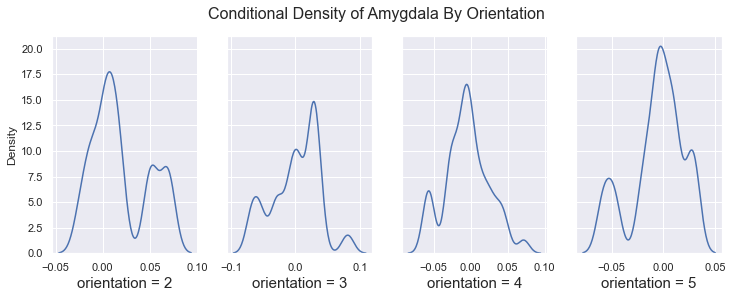

In [767]:
# seaborn kde plot
fig, ax = plt.subplots(1,4,figsize=(12,4), sharey=True)

for i, axi in enumerate(ax.flat):
    o = list(range(2,6))[i]
    sns.kdeplot(df_raw.loc[df_raw['orientation']==o,'amygdala'], bw_method=0.25, ax=axi)
    axi.set_xlabel('orientation = {}'.format(o), fontsize=15)

fig.suptitle('Conditional Density of Amygdala By Orientation', fontsize=16)

Text(0.5, 1.0, '1-D Conditional KDE of amgydala')

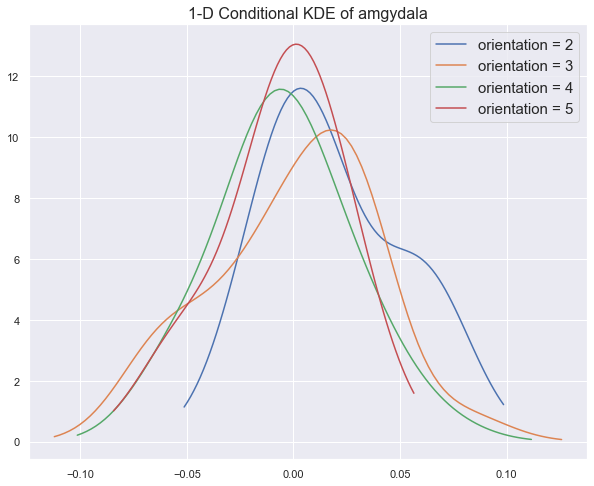

In [777]:
# plot Marginal KDE based on the model with different bandwidth
fig = plt.figure(figsize=(10,8))
for i, axi in enumerate(ax.flat):
    o = list(range(2,6))[i]
    kde, x_axis = mkde(df_raw.loc[df_raw['orientation']==o,'amygdala'].to_numpy(), bins=100, bw=0.02)
    axi = sns.lineplot(y=kde, x=x_axis.flatten(), label='orientation = {}'.format(o))
    #axi.set_xlabel('bandwidth = {}'.format(bw_i), fontsize=12)
plt.legend(fontsize=15, title_fontsize=20)
plt.title('1-D Conditional KDE of amgydala', fontsize=16)

##### -- acc

Text(0.5, 0.98, 'Conditional Density of Acc By Orientation')

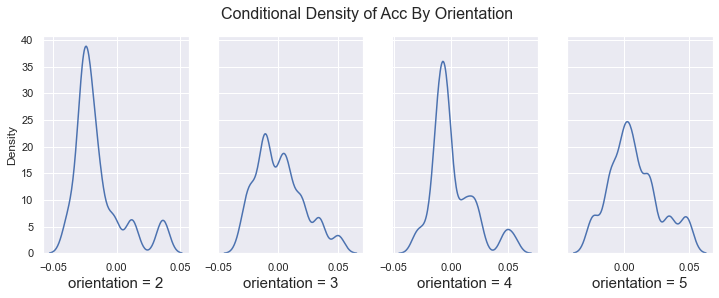

In [768]:
# seaborn kde plot
fig, ax = plt.subplots(1,4,figsize=(12,4), sharey=True)

for i, axi in enumerate(ax.flat):
    o = list(range(2,6))[i]
    sns.kdeplot(df_raw.loc[df_raw['orientation']==o,'acc'], bw_method=0.25, ax=axi)
    axi.set_xlabel('orientation = {}'.format(o), fontsize=15)

fig.suptitle('Conditional Density of Acc By Orientation', fontsize=16)

Text(0.5, 1.0, '1-D Conditional KDE of Acc')

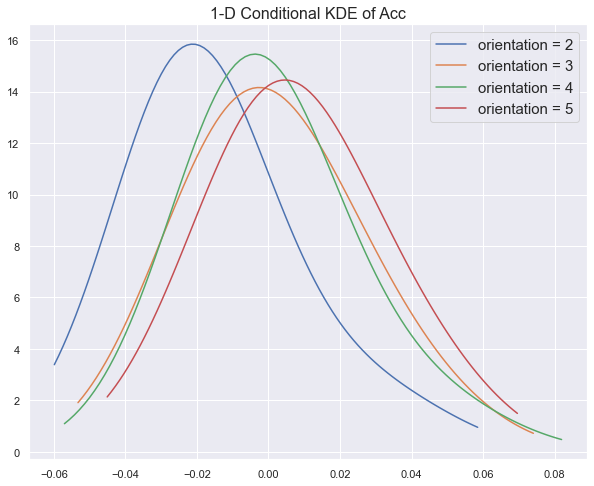

In [779]:
# plot Marginal KDE based on the model with different bandwidth
fig = plt.figure(figsize=(10,8))
for i, axi in enumerate(ax.flat):
    o = list(range(2,6))[i]
    kde, x_axis = mkde(df_raw.loc[df_raw['orientation']==o,'acc'].to_numpy(), bins=100, bw=0.02)
    axi = sns.lineplot(y=kde, x=x_axis.flatten(), label='orientation = {}'.format(o))
    #axi.set_xlabel('bandwidth = {}'.format(bw_i), fontsize=12)
plt.legend(fontsize=15, title_fontsize=20)
plt.title('1-D Conditional KDE of Acc', fontsize=16)

#### (e)
(5 points) Again we will consider the variable $\textsf{orientation}$. We will estimate the conditional *joint* distribution of the volume of the **amygdala** and **acc**, conditioning on  a function of political **orientation**: $p(\textsf{amygdala}, \textsf{acc}|\textsf{orientation}=c)$, $c = 2, \ldots, 5$.  You will use two-dimensional KDE to achieve the goal. 
 

#### Seaborn Function

Text(0.5, 0.98, '2-D KDE')

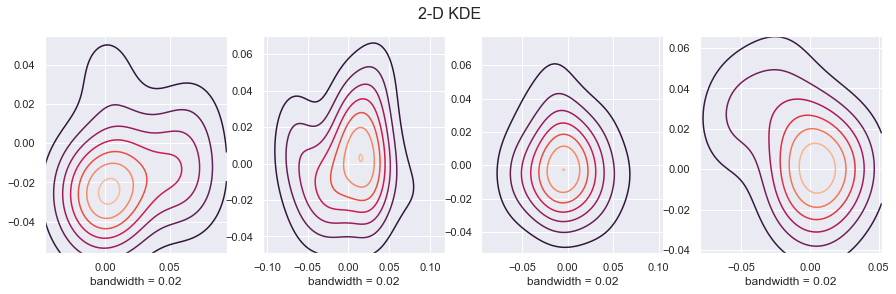

In [795]:
fig, ax = plt.subplots(1,4,figsize=(15,4))

for i, axi in enumerate(ax.flat):
    o = list(range(2,6))[i]
    zz, xx,yy = mul_kde(df_raw[df_raw['orientation']==o].to_numpy(), bw=bw, bins=100)
    axi.contour(xx,yy,zz)
    axi.set_xlabel('bandwidth = {}'.format(bw), fontsize=12)

fig.suptitle('2-D KDE', fontsize=16)

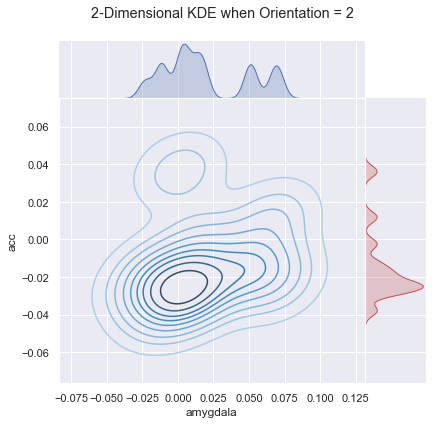

In [781]:
# tested with different bw_method. from the result, bw_method = 0.15 will give a better shape of KDE
g = sns.JointGrid(x="amygdala", y="acc", data=df_raw[df_raw['orientation']==2], space=0)
g = g.plot_joint(sns.kdeplot, cmap="Blues_d")
sns.kdeplot(df_raw.loc[df_raw['orientation']==2, "amygdala"], color="b", shade=True, bw_method=0.15, ax=g.ax_marg_x)
sns.kdeplot(y=df_raw.loc[df_raw['orientation']==2, "acc"], color="r", shade=True, bw_method=0.15, ax=g.ax_marg_y)
g.fig.suptitle('2-Dimensional KDE when Orientation = 2')
plt.subplots_adjust(top=0.9)

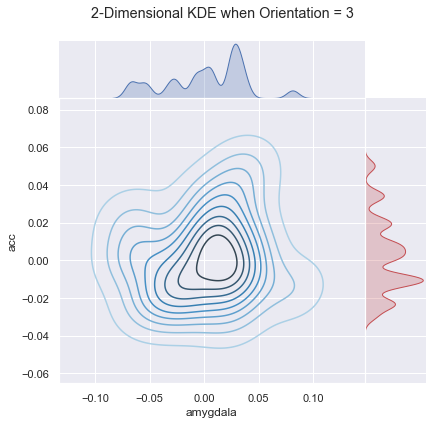

In [783]:
g = sns.JointGrid(x="amygdala", y="acc", data=df_raw[df_raw['orientation']==3], space=0)
g = g.plot_joint(sns.kdeplot, cmap="Blues_d")
sns.kdeplot(df_raw.loc[df_raw['orientation']==3, "amygdala"], color="b", shade=True, bw_method=0.15, ax=g.ax_marg_x)
sns.kdeplot(y=df_raw.loc[df_raw['orientation']==3, "acc"], color="r", shade=True, bw_method=0.15, ax=g.ax_marg_y)
g.fig.suptitle('2-Dimensional KDE when Orientation = 3')
plt.subplots_adjust(top=0.9)

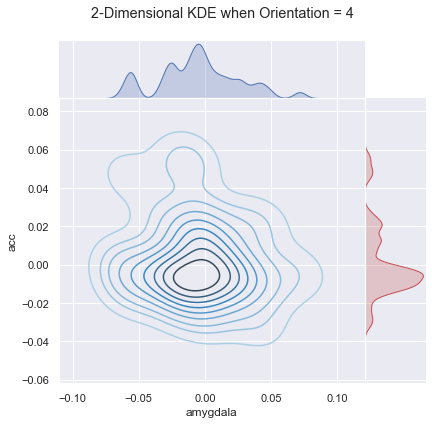

In [784]:
g = sns.JointGrid(x="amygdala", y="acc", data=df_raw[df_raw['orientation']==4], space=0)
g = g.plot_joint(sns.kdeplot, cmap="Blues_d")
sns.kdeplot(df_raw.loc[df_raw['orientation']==4, "amygdala"], color="b", shade=True, bw_method=0.15, ax=g.ax_marg_x)
sns.kdeplot(y=df_raw.loc[df_raw['orientation']==4, "acc"], color="r", shade=True, bw_method=0.15, ax=g.ax_marg_y)
g.fig.suptitle('2-Dimensional KDE when Orientation = 4')
plt.subplots_adjust(top=0.9)

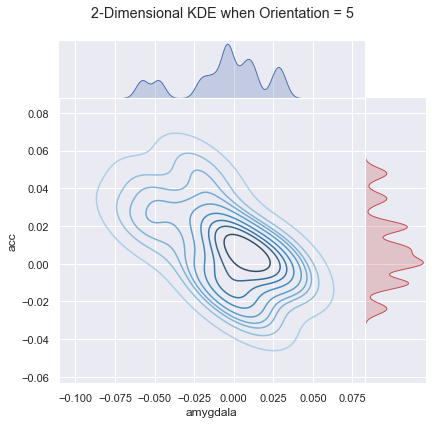

In [785]:
g = sns.JointGrid(x="amygdala", y="acc", data=df_raw[df_raw['orientation']==5], space=0)
g = g.plot_joint(sns.kdeplot, cmap="Blues_d")
sns.kdeplot(df_raw.loc[df_raw['orientation']==5, "amygdala"], color="b", shade=True, bw_method=0.15, ax=g.ax_marg_x)
sns.kdeplot(y=df_raw.loc[df_raw['orientation']==5, "acc"], color="r", shade=True, bw_method=0.15, ax=g.ax_marg_y)
g.fig.suptitle('2-Dimensional KDE when Orientation = 5')
plt.subplots_adjust(top=0.9)

#### (f)
(5 points) Using (d) and (e), evaluate whether or not the two variables are likely to be conditionally independent. To verify this, please show three plots: the map for 
<br>
$$p( \textsf{amygdala},  \textsf{acc}|\textsf{orientation}=c)$$ 
the map for 
<br>
$$p( \textsf{amygdala}|\textsf{orientation}=c) p(\textsf{acc}|\textsf{orientation}=c)$$ 
and the error map 
<br>
$$|p( \textsf{amygdala},  \textsf{acc}|\textsf{orientation}=c) - p( \textsf{amygdala}|\textsf{orientation}=c) p(\textsf{acc}|\textsf{orientation}=c)|$$
<br>
$c = 2, \ldots, 5.$ Comment on your results and whether this helps us to find out whether the two parts of brains (for emotions and decision-making) functions independently or they are related, conditionally on the political orientation (i.e., considering different types of personality). 

#### Orientation = 2

Text(0.5, 1.0, 'error map')

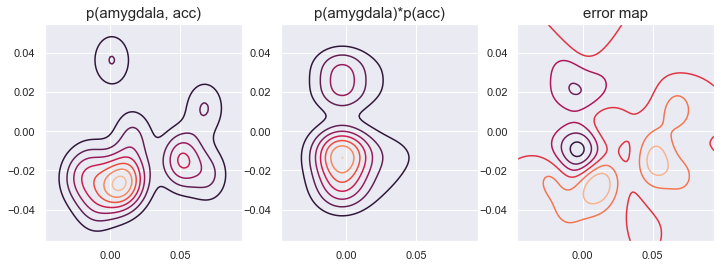

In [1335]:
# calculate joint density using 2d KDE
df_arr = df_raw[df_raw['orientation']==2].to_numpy()
z_2d, xx, yy = mul_kde(df_arr)
# calculate marginal density using 1d KDE
z_amg, axis_amg = mkde(df_arr[:,0])
z_acc, axis_acc  = mkde(df_arr[:,1])

# product
p_dot = np.outer(z_amg, z_acc)

# error
p_diff = z_2d - p_dot

fig, ax = plt.subplots(1,3,figsize=(12,4))

ax[0].contour(xx, yy, z_2d)
ax[0].set_title('p(amygdala, acc)', fontsize=15)
ax[1].contour(xx, yy, p_dot)
ax[1].set_title('p(amygdala)*p(acc)',fontsize=15)
ax[2].contour(xx, yy, p_diff)
# ax[2].imshow(-1*p_diff, cmap='gray')
ax[2].set_title('error map', fontsize=15)

#### Orientation = 3

Text(0.5, 1.0, 'error map')

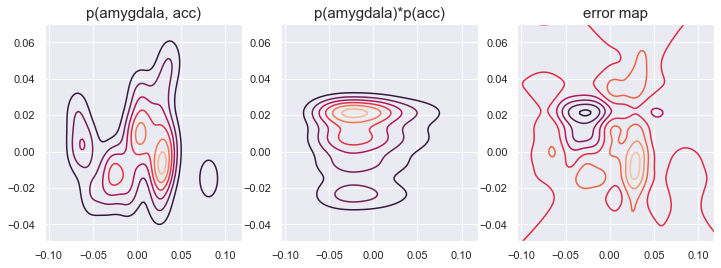

In [1336]:
# calculate joint density using 2d KDE
df_arr = df_raw[df_raw['orientation']==3].to_numpy()
z_2d, xx, yy = mul_kde(df_arr)
# calculate marginal density using 1d KDE
z_amg, axis_amg = mkde(df_arr[:,0])
z_acc, axis_acc  = mkde(df_arr[:,1])

# product
p_dot = np.outer(z_amg, z_acc)

# error
p_diff = z_2d - p_dot

fig, ax = plt.subplots(1,3,figsize=(12,4))

ax[0].contour(xx, yy, z_2d)
ax[0].set_title('p(amygdala, acc)', fontsize=15)
ax[1].contour(xx, yy, p_dot)
ax[1].set_title('p(amygdala)*p(acc)',fontsize=15)
ax[2].contour(xx, yy, p_diff)
# ax[2].imshow(-1*p_diff, cmap='gray')
ax[2].set_title('error map', fontsize=15)

#### Orientation = 4

Text(0.5, 1.0, 'error map')

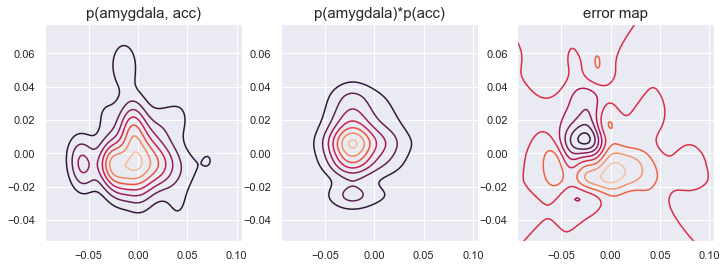

In [1337]:
# calculate joint density using 2d KDE
df_arr = df_raw[df_raw['orientation']==4].to_numpy()
z_2d, xx, yy = mul_kde(df_arr)
# calculate marginal density using 1d KDE
z_amg, axis_amg = mkde(df_arr[:,0])
z_acc, axis_acc  = mkde(df_arr[:,1])

# product
p_dot = np.outer(z_amg, z_acc)

# error
p_diff = z_2d - p_dot

fig, ax = plt.subplots(1,3,figsize=(12,4))

ax[0].contour(xx, yy, z_2d)
ax[0].set_title('p(amygdala, acc)', fontsize=15)
ax[1].contour(xx, yy, p_dot)
ax[1].set_title('p(amygdala)*p(acc)',fontsize=15)
ax[2].contour(xx, yy, p_diff)
# ax[2].imshow(-1*p_diff, cmap='gray')
ax[2].set_title('error map', fontsize=15)

#### Orientation = 5

Text(0.5, 1.0, 'error map')

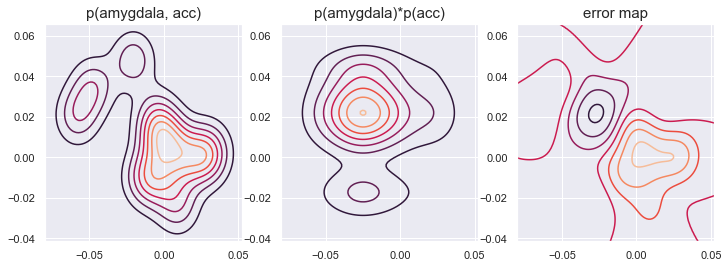

In [1338]:
# calculate joint density using 2d KDE
df_arr = df_raw[df_raw['orientation']==5].to_numpy()
z_2d, xx, yy = mul_kde(df_arr)
# calculate marginal density using 1d KDE
z_amg, axis_amg = mkde(df_arr[:,0])
z_acc, axis_acc  = mkde(df_arr[:,1])

# product
p_dot = np.outer(z_amg, z_acc)

# error
p_diff = z_2d - p_dot

fig, ax = plt.subplots(1,3,figsize=(12,4))

ax[0].contour(xx, yy, z_2d)
ax[0].set_title('p(amygdala, acc)', fontsize=15)
ax[1].contour(xx, yy, p_dot)
ax[1].set_title('p(amygdala)*p(acc)',fontsize=15)
ax[2].contour(xx, yy, p_diff)
# ax[2].imshow(-1*p_diff, cmap='gray')
ax[2].set_title('error map', fontsize=15)

## 2. Implementing EM for MNIST dataset, with PCA for dimensionality reduction. (55 points)

Implement the EM algorithm for fitting a Gaussian mixture model for the MNIST dataset. We reduce the dataset to be only two cases, of digits "2" and "6" only. Thus, you will fit GMM with $C = 2$. Use the data file **data.mat** or **data.dat**. True label of the data are also provided in **label.mat** and **label.dat**


The matrix $\textsf{images}$ is of size 784-by-1990, i.e., there are totally 1990 images, and each column of the matrix corresponds to one image of size 28-by-28 pixels (the image is vectorized; the original image can be recovered by map the vector into a matrix). 

First use PCA to reduce the dimensionality of the data before applying to EM. We will put all "6" and "2" digits together, to project the original data into 5-dimensional vectors. Now implement EM algorithm for the projected data (with 5-dimensions). 


#### (a)
(5 points) Select from data one raw image of "2" and "6" and visualize them, respectively. 

#### Answer

In [837]:
from collections import defaultdict 

In [815]:
# read data from raw image
img_raw = spio.loadmat('data.mat')
img_raw.keys()

dict_keys(['__header__', '__version__', '__globals__', 'data'])

In [816]:
df_img = img_raw['data']
df_img.shape

(784, 1990)

In [817]:
# read data from true label
label_raw = spio.loadmat('label.mat')
label_raw.keys()

dict_keys(['__header__', '__version__', '__globals__', 'trueLabel'])

In [818]:
df_label = label_raw['trueLabel']
df_label.shape

(1, 1990)

In [845]:
label_dict

defaultdict(None, {2: 1031, 6: 1989})

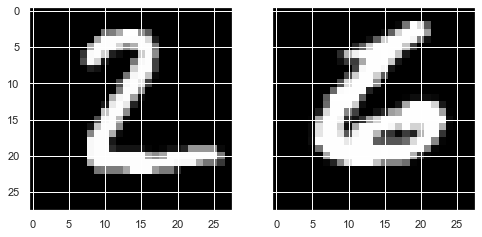

In [1319]:
fig, ax = plt.subplots(1,2,figsize=(8,4), sharey=True, sharex=True)
ax[0].imshow(df_img[:,0].reshape(28,28).T, cmap='gray')
ax[1].imshow(df_img[:,-1].reshape(28,28).T, cmap='gray')

#### (b)
(10 points) Write down detailed expression of the E-step and M-step in the EM algorithm <br>
(hint: when computing $\tau_k^i$, you can drop the $(2\pi)^{n/2}$ factor from the numerator and denominator expression, since it will be canceled out; this can help avoid some numerical issues in computation).

#### (c)
(15 points) Implement EM algorithm yourself. Use the following initialization

* initialization for mean: random Gaussian vector with zero mean <br>
* initialization for covariance: generate two Gaussian random matrix of size $n$-by-$n$: $S_1$ and $S_2$, and initialize the covariance matrix for the two components are $\Sigma_1 = S_1 S_1^T + I_n$, and  $\Sigma_2 = S_2 S_2^T + I_n$, where $I_n$ is an identity matrix of size $n$-by-$n$. 

Plot the log-likelihood function versus the number of iterations to show your algorithm is converging.

#### Answer:

In [1084]:
# Transpose df_img to make image count as row and pixel as column
img_arr = df_img.T

# Calculate the mean of the data
df_mu = img_arr.mean(axis=0)
df_mu.shape

(784,)

In [1085]:
# Calcualate matrix with zero mean
df_center = img_arr-df_mu
df_center.mean(axis=0).sum()

-3.673922074541022e-13

In [1086]:
m, n = df_center.shape
C = np.matmul(df_center.T, df_center)/m

In [1087]:
C.shape

(784, 784)

##### PCA the data

In [1088]:
# perform eigendecomposition using SVD
# extract the 5 largest eigenvector and eigenvalue
d = 5
V, Sigma, _ = np.linalg.svd(C)
V = V[:,:d]

In [1089]:
V.shape

(784, 5)

In [1090]:
S = Sigma[:d].reshape(1,-1)
S.shape

(1, 5)

In [1304]:
S

array([[6.04482546, 4.12128032, 3.88334941, 2.89902367, 2.15912352]])

In [1091]:
# transform the normalized data into 5-dimension
img_ini = df_center @ V
img_ini = img_ini/np.sqrt(S)

In [1259]:
img_ini.shape

(1990, 5)

In [1244]:
# calculate the PCA on original data
img_gmm = img_arr @ V

#### EM-GMM for MNIST

In [1288]:
K = 2
seed = 0

# initialize prior
pi = np.random.random(K)
pi = pi/np.sum(pi)
print("prior initialization: {}".format(pi))

# initialize mean and covariance
mu = np.random.randn(K,d)
print("mean initialization: {}".format(mu))
mu_old = mu.copy()

sigma = []
for ii in range(K):
    # initialize per question
    dummy = np.random.randn(d, d)
    sigma.append(dummy@dummy.T + np.eye(d))

print("Sigma initialization: {}".format(sigma))   
    
# initialize the posterior
tau = np.full((m, K), fill_value=0.)

prior initialization: [0.64522193 0.35477807]
mean initialization: [[-2.31859838  1.21762722 -0.37013065 -1.08987055 -1.0526886 ]
 [-2.14701797  1.20712462  0.58950796 -0.5455122   0.58025474]]
Sigma initialization: [array([[ 8.45349074, -2.38150449, -3.18428742, -0.66798322, -4.34491098],
       [-2.38150449, 10.05658985,  1.88007459,  1.28514448,  2.86810872],
       [-3.18428742,  1.88007459,  3.98232884, -0.65280097,  2.94972699],
       [-0.66798322,  1.28514448, -0.65280097,  3.35671864,  1.27473556],
       [-4.34491098,  2.86810872,  2.94972699,  1.27473556,  5.98995068]]), array([[ 2.47576647, -1.07850338, -1.20679783, -0.01527408, -0.20701876],
       [-1.07850338, 12.166838  ,  6.35004437, -2.55861405,  2.12431401],
       [-1.20679783,  6.35004437,  6.24293491, -2.52746748,  2.70766168],
       [-0.01527408, -2.55861405, -2.52746748,  2.95313141, -0.8796524 ],
       [-0.20701876,  2.12431401,  2.70766168, -0.8796524 ,  8.75939311]])]


In [1289]:
maxIter = 100
tol = 1e-6
log_ls = []


for ii in range(100):
    
    # E-step
    for kk in range(K):
        tau[:,kk] = pi[kk] * mvn.pdf(img_ini, mu[kk], sigma[kk])
    # print(tau)
    # normalize tau
    sum_tau = np.sum(tau, axis=1)
    # print(sum_tau)
    sum_tau.shape = (m, 1)
    tau = np.divide(tau, np.tile(sum_tau, (1, K)))
    # print(tau)
    
    
    # M-step
    for kk in range(K):
        # update prior
        pi[kk] = np.sum(tau[:,kk])/m
        
        # update component mean
        mu[kk] = img_ini.T @ tau[:,kk]/np.sum(tau[:,kk], axis=0)

        # update cov matrix
        dummy = img_ini - np.tile(mu[kk], (m,1)) # X-mu
        sigma[kk] = dummy.T @ np.diag(tau[:,kk])@ dummy/np.sum(tau[:,kk], axis=0)
        
    print('-----iteration---',ii)
    
    likeli = np.sum(np.log(sum_tau))  
    print(likeli)
    log_ls.append(likeli)
    if np.linalg.norm(mu_old-mu) < tol:
        print('training coverged')
        break
    mu_old = mu.copy()
    if ii==99:
        print('max iteration reached')
        break


-----iteration--- 0
-20634.93149071098
-----iteration--- 1
-14018.287549168654
-----iteration--- 2
-13797.91724414984
-----iteration--- 3
-13440.062164249352
-----iteration--- 4
-13042.67394398249
-----iteration--- 5
-12694.661711213674
-----iteration--- 6
-12586.761552016185
-----iteration--- 7
-12579.804166656031
-----iteration--- 8
-12579.469324761758
-----iteration--- 9
-12579.439758798977
-----iteration--- 10
-12579.435672429485
-----iteration--- 11
-12579.435030996965
-----iteration--- 12
-12579.434927760096
-----iteration--- 13
-12579.434911066717
-----iteration--- 14
-12579.434908364987
-----iteration--- 15
-12579.434907927647
-----iteration--- 16
-12579.43490785685
-----iteration--- 17
-12579.434907845389
training coverged


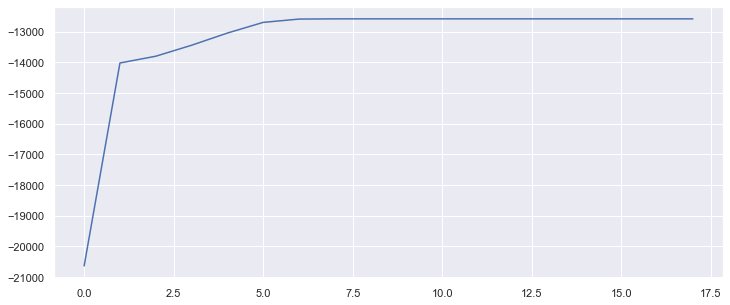

In [1290]:
plt.plot(log_ls)

#### (d)
(15 points points) Report, the fitted GMM model when EM has terminated in your algorithms as follows. Make sure to report the weights for each component, and the mean of each component (you can reformat the vector to make them into 28-by-28 matrices and show images). Ideally, you should be able to see these means corresponds to "average" images.  Report the two 784-by-784 covariance matrices by visualize their intensities. 


In [1293]:
# Show the weight from above trained GMM model
print(pi)

[0.50686583 0.49313417]


In [1294]:
# show the mean of the trained GMM model
print(mu)

[[ 0.82251573  0.27852609  0.05568925 -0.00938601 -0.12735205]
 [-0.84541923 -0.28628183 -0.05723995  0.00964737  0.13089826]]


In [1295]:
print(sigma)

[array([[ 0.34545054, -0.26983352,  0.08064707,  0.25107612,  0.29035281],
       [-0.26983352,  0.73746855, -0.49931963, -0.10656428,  0.11027944],
       [ 0.08064707, -0.49931963,  1.44496662, -0.27367203, -0.10959959],
       [ 0.25107612, -0.10656428, -0.27367203,  0.96588057,  0.06051346],
       [ 0.29035281,  0.11027944, -0.10959959,  0.06051346,  1.18027756]]), array([[ 0.26267154, -0.20015226, -0.17836526, -0.24197631, -0.0801081 ],
       [-0.20015226,  1.10814757,  0.48089395,  0.11498054, -0.03941787],
       [-0.17836526,  0.48089395,  0.53617893,  0.28238208,  0.12743369],
       [-0.24197631,  0.11498054,  0.28238208,  1.03488588, -0.06468993],
       [-0.0801081 , -0.03941787,  0.12743369, -0.06468993,  0.78089797]])]


In [1299]:
V.shape

(784, 5)

Text(0.5, 1.0, 'reconstructed $\\mu_2$')

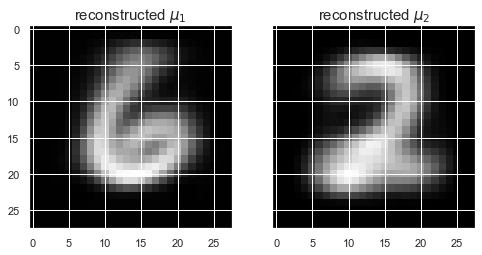

In [1353]:
# reconstruct based on Piazza post, use the reduced dimension matrix and eigenvalue from PCA, and the mu
fig, axes = plt.subplots(1,2,figsize=(8,4), sharey=True)
axes[0].imshow(((V*np.sqrt(S)).dot(mu.T)[:,0]+df_mu).reshape(28,28).T, cmap='gray')
axes[0].set_title("reconstructed $\mu_1$", fontsize=15)
axes[1].imshow(((V*np.sqrt(S)).dot(mu.T)[:,1]+df_mu).reshape(28,28).T, cmap='gray')
axes[1].set_title("reconstructed $\mu_2$", fontsize=15)

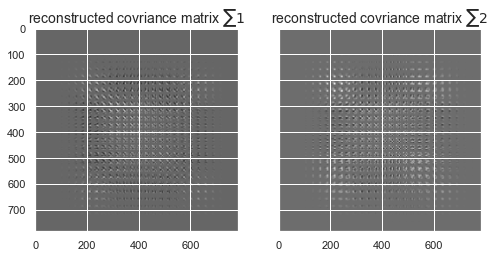

In [1352]:
fig, axes = plt.subplots(1,2,figsize=(8,4), sharey=True)
axes[0].imshow((V*np.sqrt(S).dot(sigma[0])*np.sqrt(S)).dot(V.T), cmap='gray')
axes[0].set_title("reconstructed covriance matrix $\sum1$", fontsize=14)
axes[1].imshow((V*np.sqrt(S).dot(sigma[1])*np.sqrt(S)).dot(V.T), cmap='gray')
axes[1].set_title("reconstructed covriance matrix $\sum2$", fontsize=14);

#### (e)
(10 points) Use the $\tau_{k}^i$ to infer the labels of the images, and compare with the true labels. Report the mis-classification rate for digits "2" and "6" respectively. Perform $K$-means clustering with $K=2$ (you may call a package or use the code from your previous homework). Find out the  mis-classification rate for digits "2" and "6" respectively, and compare with GMM. Which one achieves the better performance?


#### Answer:

In [1361]:
# from above, the 1st image is 6, so it is checking the 1st tau with true label 6
((tau[:,0]>0.05)!= (label_raw['trueLabel'] == 6)).mean()

0.054271356783919596

In [1362]:
# from above, the 2nd image is 2, so it is checking the 1st tau with true label 2
((tau[:,1]>0.05)!= (label_raw['trueLabel']== 2)).mean()

0.023618090452261306

In [1365]:
# import Kmeans from SKlearn
from sklearn.cluster import KMeans
ks = KMeans(2)

In [1367]:
# to use the reduced dimensional data for Kmeans
img_ini.shape

(1990, 5)

In [1368]:
# fit the model with reduced data
ks.fit(img_ini)

KMeans(n_clusters=2)

In [1369]:
ks_label = ks.labels_
ks_label

array([1, 0, 1, ..., 1, 1, 1], dtype=int32)

In [1370]:
# build the true label of Kmeans using the number 2 and 6
ks_label[ks_label==0] = 2
ks_label[ks_label==1] = 6

In [1372]:
# match the Kmeans label versus the true label and generate the performance
((ks_label != label_raw['trueLabel'])).mean()

0.061809045226130656

Both GMM and Kmeans are using the E-M algorithem, the GMM is the soft cluster
From above, we can see the GMM model has slightly better performance than Kmeans. 

## 3. (Bonus) Implementing EM for MNIST dataset, with low-rank approximation. (15 points)